# Viewing Images

This notebook discusses ways to view and interact with DICOM images produced in the [previous notebook](00_running_simulations.ipynb)

First, below is a demonstration of the directory structure output by `run_batch_sim`:

In [1]:
!tree results/test -P *_000.dcm | head -n 15

results/test
├── CCT189
│   ├── diameter112mm
│   │   ├── dose_025
│   │   │   └── fbp hanning205
│   │   │       └── 11.2 cm CCT189_000.dcm
│   │   └── dose_100
│   │       └── fbp hanning205
│   │           └── 11.2 cm CCT189_000.dcm
│   └── diameter292mm
│       ├── dose_025
│       │   └── fbp hanning205
│       │       └── 29.2 cm CCT189_000.dcm
│       └── dose_100
│           └── fbp hanning205


In [2]:
!pip install torchvision -q
!pip install seaborn -q
!pip install matplotlib -q

In [3]:
from pathlib import Path

import pandas as pd
from torchvision.datasets.utils import download_and_extract_archive

import pediatricIQphantoms

download_full_dataset = True #Warning: if set to True this will download and take about 3.4 Gb of disk space
if download_full_dataset:
    datadir = Path('data/pediatricIQphantoms/')
    if not datadir.exists():
        download_and_extract_archive(pediatricIQphantoms.URL, download_root=datadir.parent)
else:
    datadir = Path('results/test/')

metadata = pd.read_csv(datadir / 'metadata.csv')
metadata.file = metadata.file.apply(lambda o: datadir / o)
metadata.head()

,Name,effective diameter [cm],age [year],pediatric subgroup,phantom,scanner,Dose [%],recon,kernel,FOV [cm],file,patientid,studyid,series,repeat
0,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,data/pediatricIQphantoms/CTP404/diameter_112mm...,0.0,0,simulation,0
1,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,data/pediatricIQphantoms/CTP404/diameter_112mm...,0.0,0,simulation,1
2,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,data/pediatricIQphantoms/CTP404/diameter_112mm...,0.0,0,simulation,2
3,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,data/pediatricIQphantoms/CTP404/diameter_112mm...,0.0,0,simulation,3
4,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,data/pediatricIQphantoms/CTP404/diameter_112mm...,0.0,0,simulation,4


In [4]:
import matplotlib.pyplot as plt
import pydicom
if download_full_dataset:
    row = metadata[(metadata['Dose [%]']==25) &
                   (metadata['phantom'] == 'MITA-LCD') &
                   (metadata['recon'] == 'fbp') &
                   (metadata['kernel'] == 'D45') &
                   (metadata['FOV [cm]'] == 32.0) &
                   (metadata['repeat'] == 0)]
row

,Name,effective diameter [cm],age [year],pediatric subgroup,phantom,scanner,Dose [%],recon,kernel,FOV [cm],file,patientid,studyid,series,repeat
2740,29.2 cm MITA-LCD,29.2,21.0,adolescent,MITA-LCD,Siemens Somatom Definition,25.0,fbp,D45,32.0,data/pediatricIQphantoms/MITA-LCD/diameter_292...,14.0,56,simulation,0


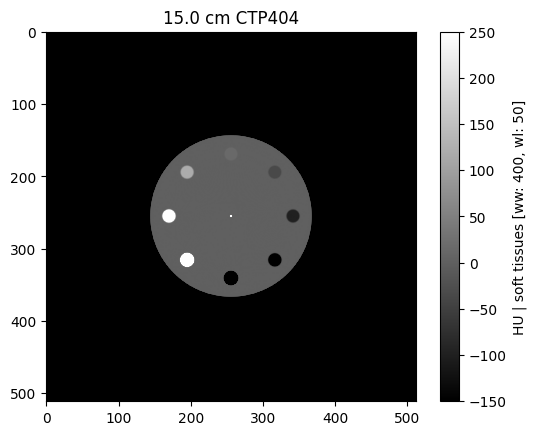

In [5]:
from utils import browse_studies
browse_studies(metadata, phantom='CTP404', fov=34, dose=100, recon='noise free', kernel='D45', repeat=0, display='soft tissues')

In [6]:
from utils import study_viewer

In [7]:
study_viewer(metadata)

interactive(children=(Dropdown(description='phantom', options=('CTP404', 'MITA-LCD', 'uniform'), value='CTP404…

### Viewing with Slicer

**Drag and drop the unzipped dataset** into [3D Slicer](https://www.slicer.org/) to automatically load the dataset into [Slicer's DICOM database](https://slicer.readthedocs.io/en/latest/user_guide/modules/dicom.html)

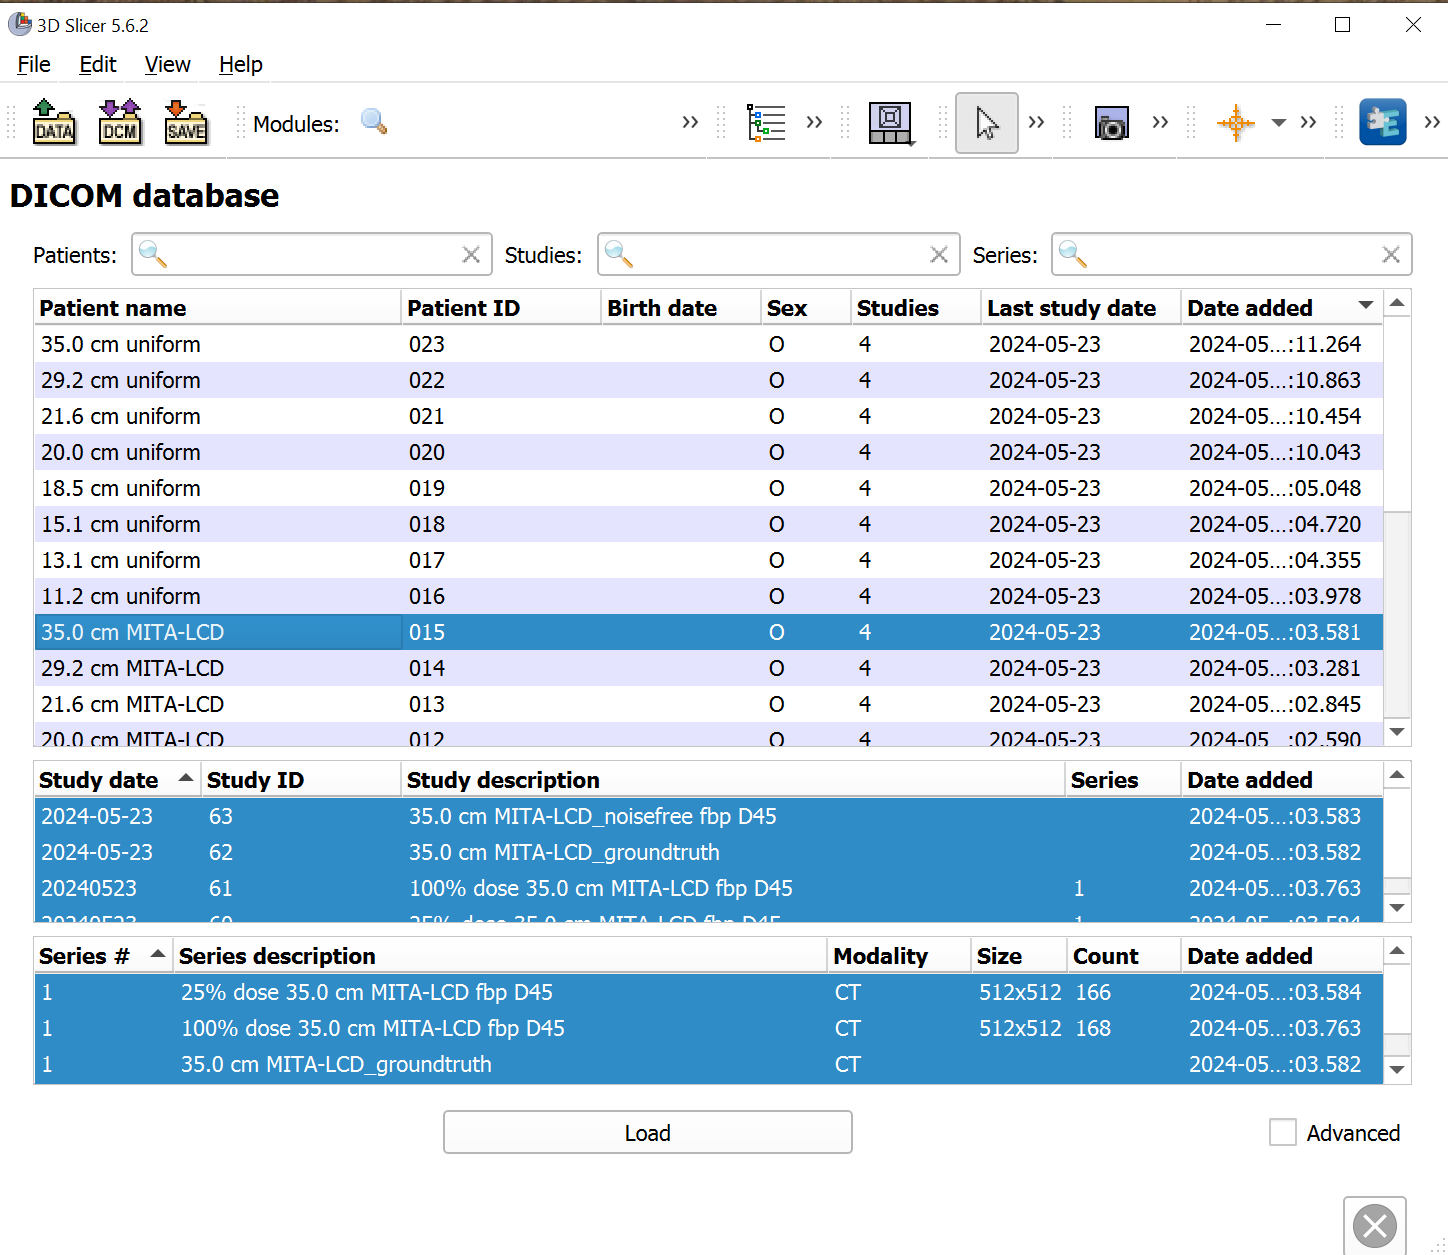
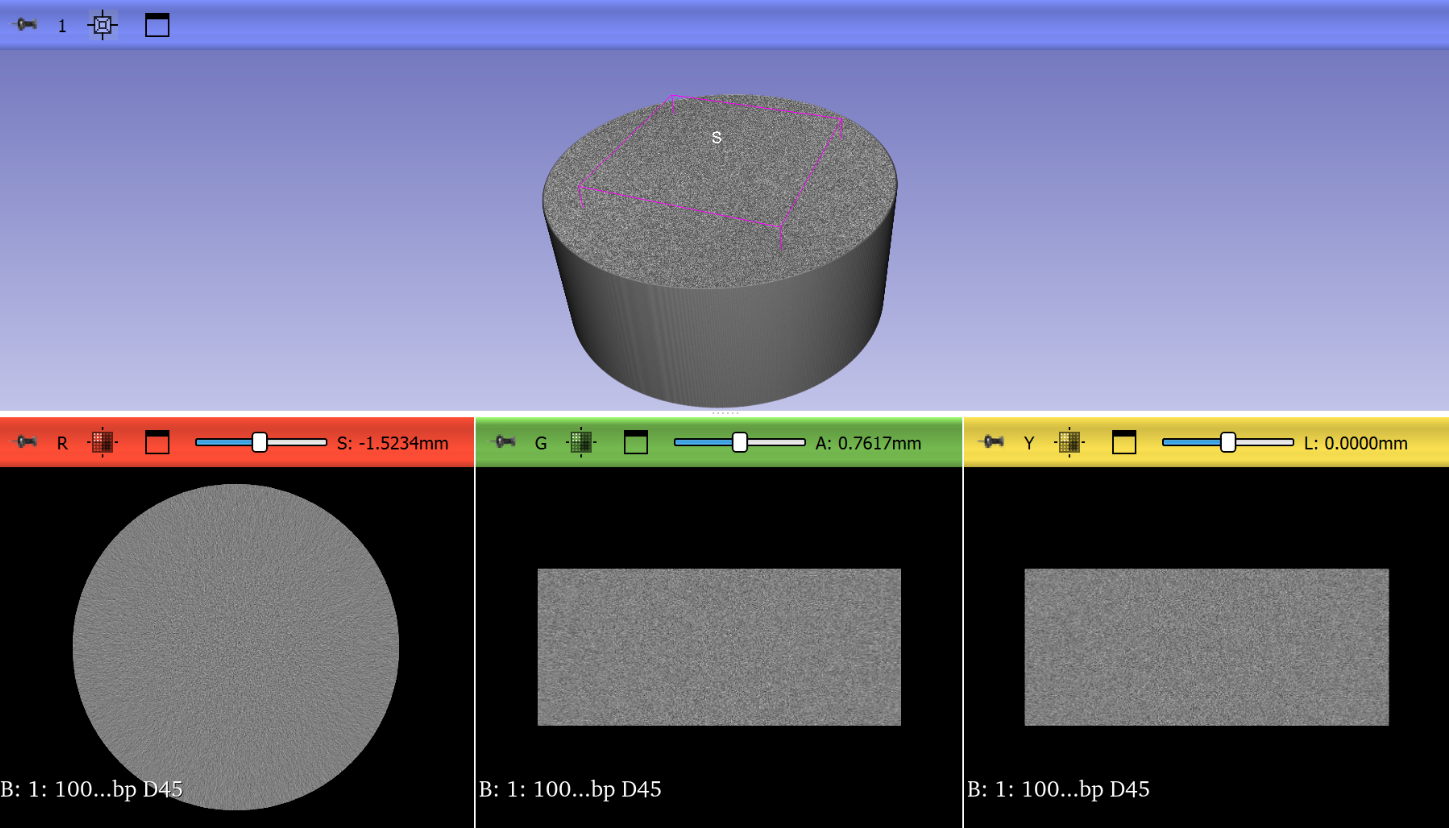)

### Other Viewers
1. [Radiant](https://www.radiantviewer.com/) *Note*: this is a [freemium](https://en.wikipedia.org/wiki/Freemium) product
2. [SNAP ITK](http://www.itksnap.org/pmwiki/pmwiki.php?n=Main.HomePage)
3. [Fiji/ImageJ](https://imagej.net/software/fiji/)

## Conclusions

This notebook introduced several ways to interact with view the DICOM images produced by [CT simulations introduced previously](00_running_simulations.ipynb). 

**Next** see the notebook on how these images can be used to [assess denoising performance in pediatric-sized patients](02_pediatric_denoising_evaluation.ipynb).